# importing essential liraries

In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# load the dataset

In [4]:
# Load the dataset
data = fetch_california_housing()

# Extract features and target
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Display first few rows
X.head()

Shape of X: (20640, 8)
Shape of y: (20640,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


# preprocessing or feature scaling

In [15]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# train the lasso model

In [16]:
# Initialize Lasso model (alpha is the regularization strength)
lasso = Lasso(alpha=0.1, random_state=50)

# Train the model
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1, random_state=50)

In [17]:
# Predict on test data
y_pred = lasso.predict(X_test_scaled)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.6601
R² Score: 0.4919


# importent features affecting the house price:

Feature Importance:
      Feature  Coefficient
0      MedInc     0.707853
1    HouseAge     0.103952
2    AveRooms    -0.000000
3   AveBedrms     0.000000
4  Population    -0.000000
5    AveOccup    -0.000000
7   Longitude    -0.000000
6    Latitude    -0.015214


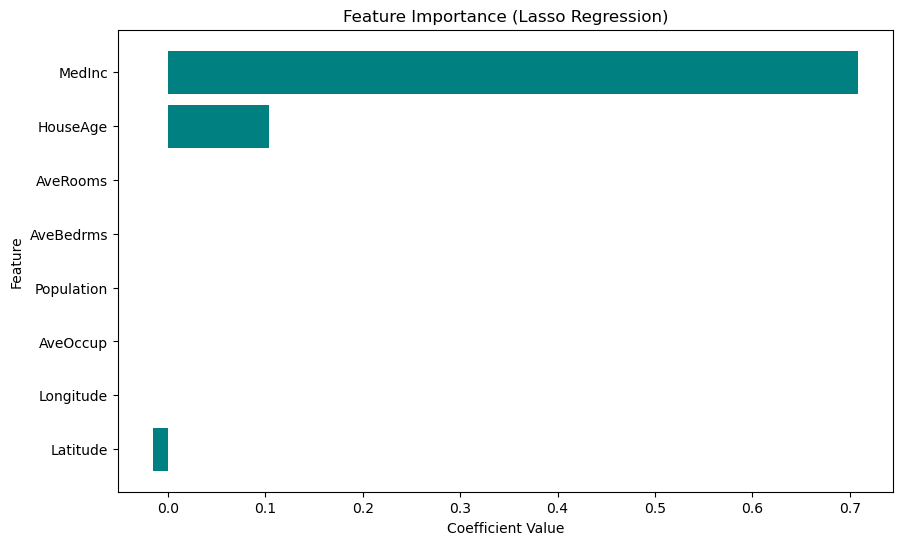

In [20]:
# Create a DataFrame for feature importance

feature_importance = pd.DataFrame({
    'Feature': data.feature_names,
    'Coefficient': lasso.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Feature Importance:")
print(feature_importance)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='teal')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Lasso Regression)')
plt.gca().invert_yaxis()
plt.show()